## Week 1: data and distributions

The first step is to import all the different libraries I'll need. The steps.csv file is in American format. To make the dataframe readable, I need to convert it to an European format.

The head of a dataframe gives me an overview of the data cleaning that might be necessary. 

In [239]:
import seaborn as sns # the library for plotting the data
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=';') # this seperation helps with converting the different CVS formats: American and European
df1.head() # showing the first 5 rows

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now the data is read in a pandas dataframe, the next step is to find the mean of steps. The mean is the value that is most common and a good measure of central tendency. First I calculate the mean, round the numbers and clean the outcomes. And then I transpose the dataframe so it's ready for plotting a graph. 

In [240]:
#measuring the mean of steps per day
mean_of_steps = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
mean_of_steps = mean_of_steps.round() #round the number
mean_of_steps.drop('id', axis=1, inplace=True) #remove column with id index (clean up)
    
#transpose the dataframe
mean_of_steps = mean_of_steps.transpose()
mean_of_steps = mean_of_steps.rename(columns={928: 'mean'})
mean_of_steps_new = mean_of_steps['mean'].dropna().reset_index().copy()
mean_of_steps_new

,index,mean
0,20-6-2013,3642.0
1,21-6-2013,9035.0
2,22-6-2013,10890.0
3,23-6-2013,7403.0
4,24-6-2013,8110.0
...,...,...
322,8-5-2014,7210.0
323,9-5-2014,9571.0
324,10-5-2014,7615.0
325,11-5-2014,6806.0


To make sure the values (dates) are readible for plotting the graph, I need to convert it to datetime.

Below you can find the first line graph with the mean on the y-axis for a number of dates. You can see that between 2014 january to april there are more registered steps. Some days in this period can reach almost 30000 steps. For the remaining months the average lies around the 5000 and 10000.

In [241]:
mean_of_steps_new['index'] = pd.to_datetime(mean_of_steps_new['index']) # convert to datetime

Text(0.5, 0.98, 'Mean of steps daily')

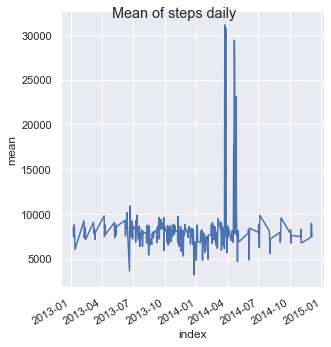

In [242]:
graph1 = sns.relplot(x="index", y="mean", kind="line", data=mean_of_steps_new) 
graph1.fig.autofmt_xdate()

graph1.fig.suptitle('Mean of steps daily') # adding a title

Below I have some errors with displaying new graphs. I tried to first ad another graph to show the mean, but by most graphs I tried I get the error: module seaborn has no attribute displot. Most anwers on the internet tell me that the version of seaborn isn't right. But I couldn't seem to figure out how it worked, and anaconda has no updates either. 

In [243]:
# x = sns.displot(mean_of_steps_new, x="index", y="mean", kind="kde")
# x.fig.autofmt_xdate()

# x.fig.suptitle('mean of steps daily')

Here I want to try the next step of analyzing the data by finding the mean and the median. But here I have multiple problems. The same attribute error; seaborn has no attribute, but also the date time isn't working anymore, and in addition I know this might not be the best way as I now take the median of a mean. 

In [244]:
# mean_size = mean_of_steps_new['mean'].mean()
# median_size = mean_of_steps_new['mean'].median()

# sns.distplot(mean_of_steps_new, kde=False)
# plt.title('Steps per day for all participants')
# plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
# plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
# plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
# plt.show()